In [1]:
import pandas as pd
df = pd.read_csv("Coca-Cola_stock_history.csv")
df = df[['Date', 'Close']].sort_values('Date').reset_index(drop=True)
print(df)


                            Date      Close
0                     1962-01-02   0.050016
1                     1962-01-03   0.048902
2                     1962-01-04   0.049273
3                     1962-01-05   0.048159
4                     1962-01-08   0.047664
...                          ...        ...
15306  2022-10-20 00:00:00-04:00  55.080002
15307  2022-10-21 00:00:00-04:00  55.959999
15308  2022-10-24 00:00:00-04:00  57.570000
15309  2022-10-25 00:00:00-04:00  58.950001
15310  2022-10-26 00:00:00-04:00  59.389999

[15311 rows x 2 columns]


In [2]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()
print(df)

                            Date      Close    SMA20      SMA50
0                     1962-01-02   0.050016      NaN        NaN
1                     1962-01-03   0.048902      NaN        NaN
2                     1962-01-04   0.049273      NaN        NaN
3                     1962-01-05   0.048159      NaN        NaN
4                     1962-01-08   0.047664      NaN        NaN
...                          ...        ...      ...        ...
15306  2022-10-20 00:00:00-04:00  55.080002  55.9830  59.601667
15307  2022-10-21 00:00:00-04:00  55.959999  55.8510  59.465619
15308  2022-10-24 00:00:00-04:00  57.570000  55.8360  59.352240
15309  2022-10-25 00:00:00-04:00  58.950001  55.9645  59.250577
15310  2022-10-26 00:00:00-04:00  59.389999  56.0850  59.147191

[15311 rows x 4 columns]


In [3]:
# Step 1: Problem Definition
# Objective: PredictCoca-Cola'sstockprices(e.g.,Closeprice)and analyze trends.

import pandas as pd
import yfinance as yf
df = yf.download("KO", start="2010-01-01", end="2025-01-01", actions=True)
df = df.reset_index()
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']]
print(df.head())

C:\Users\anike\AppData\Local\Temp\ipykernel_29444\297584547.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("KO", start="2010-01-01", end="2025-01-01", actions=True)
[*********************100%***********************]  1 of 1 completed

Price        Date       Open       High        Low      Close    Volume  \
Ticker                    KO         KO         KO         KO        KO   
0      2010-01-04  17.472086  17.490426  17.392612  17.435406  13870400   
1      2010-01-05  17.377324  17.420119  17.160299  17.224489  23172400   
2      2010-01-06  17.224487  17.251997  17.111389  17.218374  19264600   
3      2010-01-07  17.218372  17.230598  17.041083  17.175577  13234600   
4      2010-01-08  16.952448  17.007468  16.735422  16.857691  28712400   

Price  Dividends Stock Splits  
Ticker        KO           KO  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  


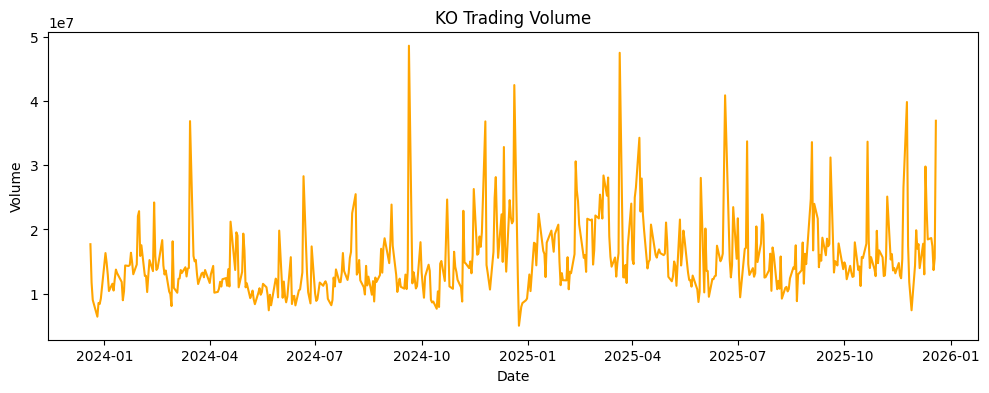

TypeError: arg must be a list, tuple, 1-d array, or Series

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import time
# Option 1: Use plt.plot instead of plt.bar (simpler and avoids TypeError)
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Volume'], color='orange')
plt.title(f'{symbol} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()
import matplotlib.pyplot as plt

# Ensure 'Volume' is numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(subset=['Volume'], inplace=True)

# Plot volume safely using a line plot
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Volume'], color='orange')
plt.title(f'{symbol} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

symbol = 'KO'
df = yf.download(symbol, period='2y', interval='1d', auto_adjust=True)

# Ensure numeric types
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(inplace=True)

# Plot closing price
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title(f'{symbol} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot trading volume (line plot is safer than bar)
plt.figure(figsize=(12,4))
plt.plot(df.index, df['Volume'], color='orange')
plt.title(f'{symbol} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()





In [ ]:
# Step 2: Data Collection.
# Use Yahoo Finance API for historical data. We'll fetch data from 2015 to the present

import yfinance as yf
import pandas as pd
# Fetch Coca-Cola stock data
ticker = 'KO' # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01',
end='2023-12-31')
# Reset index for easier handling
data.reset_index(inplace=True)
# Display data structure
print(data.info())
print(data.head())


In [ ]:
# Step 3: Data Cleaning
# 3.1 Handle Missing Values
# Check for missing values
print(data.isnull().sum())
# Fill missing numerical values with the column mean
data.fillna(method='ffill', inplace=True) # Forward fill for stock data continuity
data.fillna(0, inplace=True) # Replace remaining missing dividends/splits with 0
# Confirm no missing values remain
print(data.isnull().sum())

In [ ]:
# Step 4: Feature Engineering
# 1. Add Moving Averages: 20-day and 50-day for trend detection.
# 2. Add Daily Returns: Helps capture volatility.
# 3. Add Volatility: Standard deviation over a rolling window

# Add Moving Averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
# Add Daily Returns
data['Daily_Return'] = data['Close'].pct_change()
# Add Volatility (standard deviation of returns over a rolling window)
data['Volatility'] =data['Daily_Return'].rolling(window=20).std()
# Drop rows with NA due to rolling calculations
data.dropna(inplace=True)
print(data.head())

Step 5: Exploratory Data Analysis (EDA)
5.1 Summary Statistics
Use descriptive statistics to summarize the data

In [ ]:
# Summary statistics
print(data.describe())

5.2 Data Visualization
Visualize the trends and relationships in the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Line plot for stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20',
linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='MA 50',
linestyle='--')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step 6: Data Splitting
Split the data into training and testing sets for model training

In [ ]:
# Define split ratio
train_size = 0.8

# Compute split index
split_index = int(len(data) * train_size)

# Split features and target
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

print("Training period:", data["Date"].iloc[0], "to", data["Date"].iloc[split_index - 1])
print("Testing period:", data["Date"].iloc[split_index], "to", data["Date"].iloc[-1])



Step 7: Model Training
7.1 Use Random Forest for Initial Predictions
A good baseline model for tabular data is Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("Mean Absolute Error:", round(mae, 4))
print("Root Mean Squared Error:", round(rmse, 4))

import pandas as pd
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", round(mae, 4))
print("Root Mean Squared Error:", round(rmse, 4))



Step 8: Live Prediction System
Integrate a system to fetch live data and make predictions

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load historical data
data = pd.read_csv("Coca-Cola_stock_history.csv")

# Robust date parsing
data["Date"] = pd.to_datetime(
    data["Date"],
    format="mixed",
    utc=True,
    errors="coerce"
).dt.tz_convert(None)

data = data.sort_values("Date").dropna(subset=["Date"])

# Features and target
features = ["Open", "High", "Low", "Close", "Volume"]
data["Target"] = data["Close"].shift(-1)
data = data.dropna()

X = data[features]
y = data["Target"]

# Time based split
split = int(len(data) * 0.8)
X_train = X.iloc[:split]
y_train = y.iloc[:split]

# Train Random Forest
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Save model
joblib.dump(model, "rf_coke_model.pkl")

print("Model trained and saved")

import yfinance as yf
import pandas as pd

def fetch_live_features(ticker="KO"):
    df = yf.Ticker(ticker).history(period="5d")
    df = df.reset_index()

    latest = df.iloc[-1]

    return pd.DataFrame([{
        "Open": latest["Open"],
        "High": latest["High"],
        "Low": latest["Low"],
        "Close": latest["Close"],
        "Volume": latest["Volume"]
    }])
import joblib

# Load saved model
model = joblib.load("rf_coke_model.pkl")

# Fetch live features
live_features = fetch_live_features("KO")

# Predict next day closing price
prediction = model.predict(live_features)

print(f"Predicted next day closing price: ${prediction[0]:.2f}")


Deploy using Streamit or Flask or a web-base dashbord.

In [ ]:
from flask import Flask, jsonify
import pandas as pd
import yfinance as yf
import joblib

app = Flask(__name__)
model = joblib.load("rf_coke_model.pkl")

def fetch_live_data(ticker="KO"):
    df = yf.Ticker(ticker).history(period="5d").reset_index()
    latest = df.iloc[-1]

    return pd.DataFrame([{
        "Open": latest["Open"],
        "High": latest["High"],
        "Low": latest["Low"],
        "Close": latest["Close"],
        "Volume": latest["Volume"]
    }])

@app.route("/predict")
def predict():
    features = fetch_live_data()
    prediction = model.predict(features)
    return jsonify({
        "predicted_next_close": round(float(prediction[0]), 2)
    })

# if __name__ == "__main__":
    # app.run(debug=True)
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)
   
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

daily_close_px = KO_Data[['Close']]
daily_pct_change = daily_close_px.pct_change().dropna()

daily_pct_change.hist(bins=50, figsize=(12,8))
plt.title('Histogram of Daily Percentage Changes')
plt.xlabel('Daily % Change')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

adj_close_px = KO_Data['Close']

# Short and long rolling means
KO_Data['42'] = adj_close_px.rolling(window=42).mean()
KO_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot
KO_Data[['Close', '42', '252']].plot(figsize=(12,6))
plt.title('KO Adjusted Close Price with 42-day and 252-day Rolling Means')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
